In [7]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# PARAMETERS

In [8]:
RELOAD_DATA = True
DATA_PATH = "data/SWaT/"

# Process data 2015

In [3]:
if RELOAD_DATA: 
    swat_2015_attack_df = pd.read_csv(DATA_PATH+"SWaT_Dataset_Attack_v0.csv")

In [5]:
# Dataset Start Time and End Time
df_time_start = np.array('2015-12-28T10:00:00', dtype=np.datetime64)
df_time_end = np.array('2016-01-02T02:59:59', dtype=np.datetime64)

# Visulization Strat Time and End Time
time_start = np.array('2015-12-29T00:00:00', dtype=np.datetime64)
time_end = np.array('2015-12-30T00:00:00', dtype=np.datetime64)

In [6]:
anomaly_feature = ['MV304', 
#                    'MV303', 
                   'LIT301', 
#                    'MV303', 
#                    'AIT504', 
                   'AIT504', 
#                    'MV101', 
                   'LIT101', 
                   'UV401', 
                   'AIT502', 
                   'P501']
anomaly_time_start = [np.array('2015-12-29T11:11:25', dtype=np.datetime64), 
#                       np.array('2015-12-29T11:35:40', dtype=np.datetime64),
                      np.array('2015-12-29T11:57:25', dtype=np.datetime64),
#                       np.array('2015-12-29T14:38:12', dtype=np.datetime64),
#                       np.array('2015-12-29T18:15:01', dtype=np.datetime64),
                      np.array('2015-12-29T18:15:43', dtype=np.datetime64),
#                       np.array('2015-12-29T18:30:00', dtype=np.datetime64),
                      np.array('2015-12-29T18:30:00', dtype=np.datetime64),
                      np.array('2015-12-29T22:55:18', dtype=np.datetime64),
                      np.array('2015-12-29T22:55:18', dtype=np.datetime64),
                      np.array('2015-12-29T22:55:18', dtype=np.datetime64)
                      ]
anomaly_time_end = [np.array('2015-12-29T11:15:17', dtype=np.datetime64), 
#                     np.array('2015-12-29T11:42:50', dtype=np.datetime64),
                    np.array('2015-12-29T12:02:00', dtype=np.datetime64),
#                     np.array('2015-12-29T14:50:08', dtype=np.datetime64),
#                     np.array('2015-12-29T18:15:01', dtype=np.datetime64),
                    np.array('2015-12-29T18:22:17', dtype=np.datetime64),
#                     np.array('2015-12-29T18:42:00', dtype=np.datetime64),
                    np.array('2015-12-29T18:42:00', dtype=np.datetime64),
                    np.array('2015-12-29T23:03:00', dtype=np.datetime64),
                    np.array('2015-12-29T23:03:00', dtype=np.datetime64),
                    np.array('2015-12-29T23:03:00', dtype=np.datetime64)
                    ]
assert len(anomaly_feature) == len(anomaly_time_start) and len(anomaly_feature) == len(anomaly_time_end)

In [7]:
if RELOAD_DATA:
    swat_2015_attack_df_viz = swat_2015_attack_df[anomaly_feature]
    swat_2015_attack_df_viz['Label'] = swat_2015_attack_df["Normal/Attack"]
    swat_2015_attack_df_viz['Timestamp'] = pd.to_datetime(swat_2015_attack_df[' Timestamp'])

    swat_2015_attack_df_viz = swat_2015_attack_df_viz[swat_2015_attack_df_viz["Timestamp"] > time_start]
    swat_2015_attack_df_viz = swat_2015_attack_df_viz[swat_2015_attack_df_viz["Timestamp"] < time_end]
    swat_2015_attack_df_viz.to_pickle(DATA_PATH+"swat_2015_attack_df.pkl")

In [36]:
swat_2015_attack_df_viz  = pd.read_pickle(DATA_PATH+"swat_2015_attack_df.pkl")

In [37]:
number_of_samples = swat_2015_attack_df_viz.shape[0]

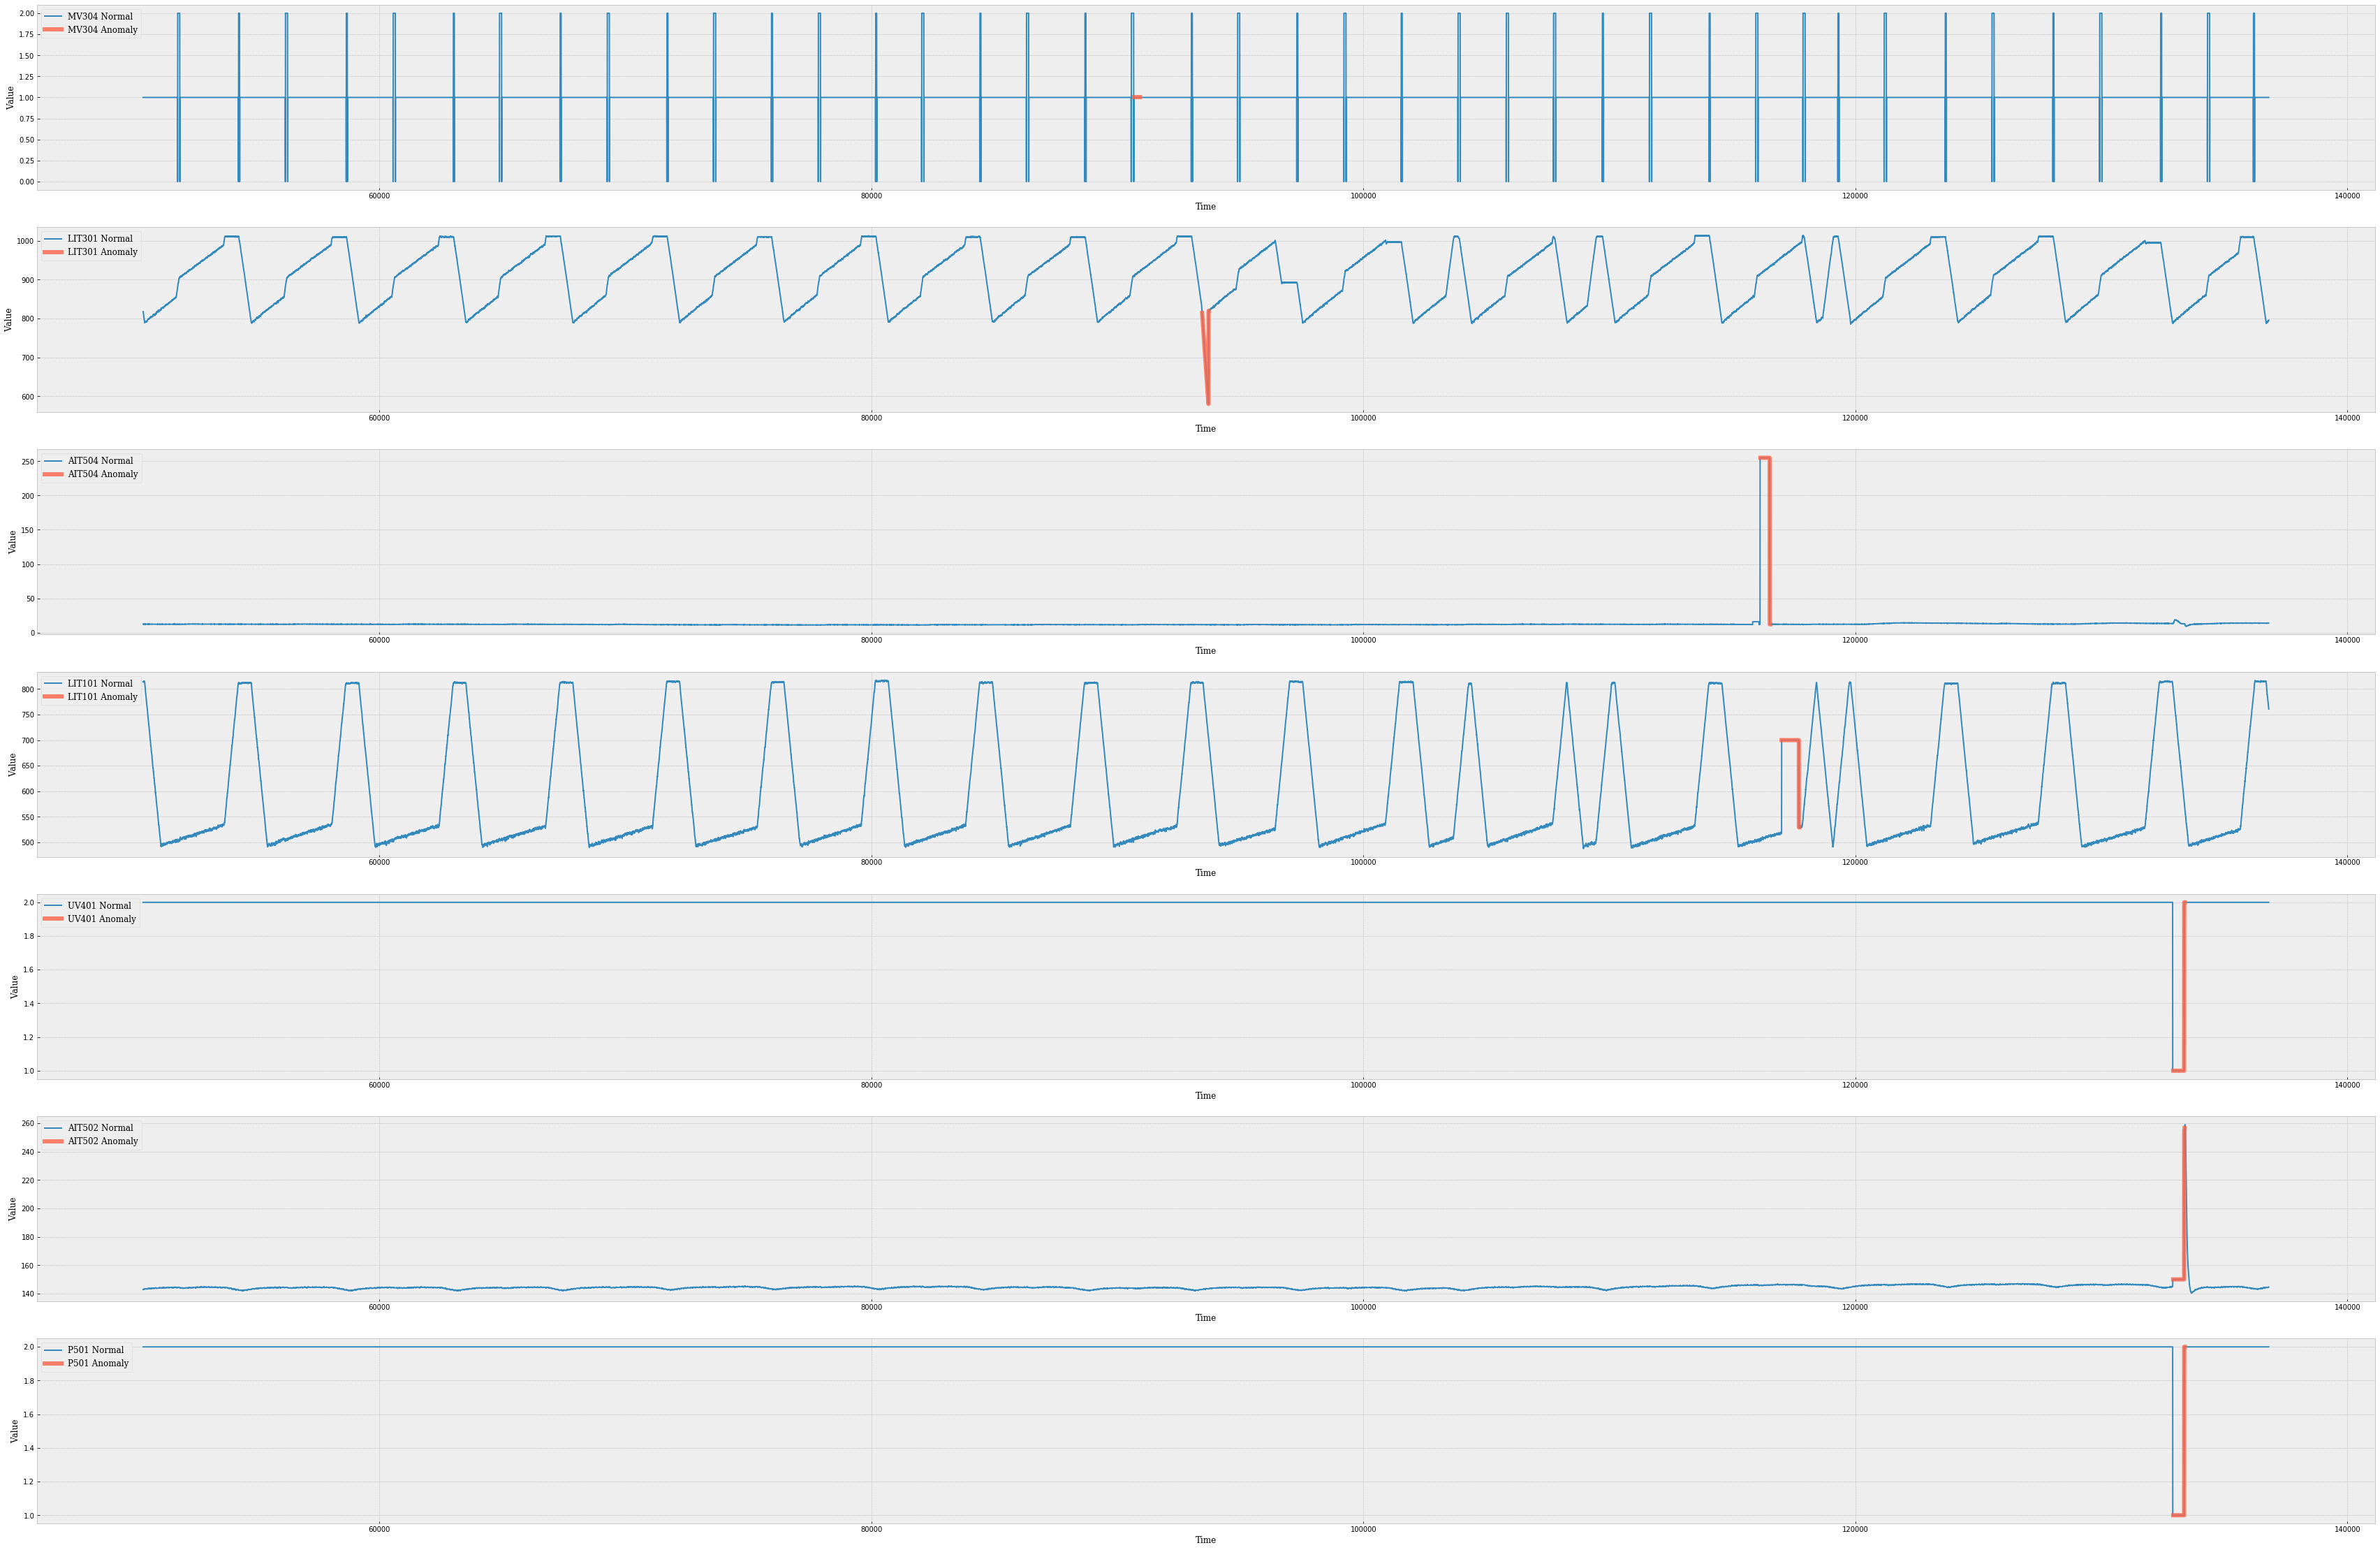

In [38]:
number_of_fig = len(anomaly_feature)
with plt.style.context('bmh'):
    font = {'size': 12, 'family': 'serif'}
    font_legend = {'size': 12, 'family': 'serif'}
    fig, axs = plt.subplots(number_of_fig, 1, figsize=(60, 40))
    for i in range(number_of_fig):
        start_attack_time = anomaly_time_start[i]
        end_attack_time = anomaly_time_end[i]
        attack_df = swat_2015_attack_df_viz[swat_2015_attack_df_viz["Timestamp"] >= start_attack_time]
        attack_df = attack_df[attack_df["Timestamp"] <= end_attack_time]
        attack_indx =list(attack_df.index)
        
        label = "label_" + anomaly_feature[i]
        label_data = [0] * number_of_samples
        swat_2015_attack_df_viz[label] = label_data
        swat_2015_attack_df_viz[label][attack_indx] = 1
        
        axs[i].plot(swat_2015_attack_df_viz[anomaly_feature[i]],label='{} Normal'.format(anomaly_feature[i]))
        axs[i].plot(swat_2015_attack_df_viz[anomaly_feature[i]].loc[attack_indx],label='{} Anomaly'.format(anomaly_feature[i]), color='tomato', linewidth=6, alpha=0.8)
        axs[i].set_xlabel('Time', fontdict=font)
        axs[i].set_ylabel('Value', fontdict=font)
        axs[i].legend(loc='upper left', prop=font_legend)

In [40]:
swat_2015_attack_df_viz.to_pickle(DATA_PATH+"swat_2015_attack_df.pkl")

# Process Data 2019

In [9]:
anomaly_feature_2019 = ['FIT 401', 
                       'LIT 301', 
                       'P601 Status', 
                       'MV201', 
                       'P101 Status', 
                       'MV 501', 
                       'P301 Status', 
                  ]
# Visulization Strat Time and End Time

anomaly_time_start_2019 = [np.array('2019-07-20 07:07:00', dtype=np.datetime64), 
                           np.array('2019-07-20 07:13:30', dtype=np.datetime64), 
                           np.array('2019-07-20 07:25:27', dtype=np.datetime64), 
                           np.array('2019-07-20 07:37:20', dtype=np.datetime64), 
                           np.array('2019-07-20 07:37:20', dtype=np.datetime64),
                           np.array('2019-07-20 07:52:30', dtype=np.datetime64),
                           np.array('2019-07-20 08:01:26', dtype=np.datetime64),
                      ]
anomaly_time_end_2019 = [np.array('2019-07-20 07:09:00', dtype=np.datetime64), 
                         np.array('2019-07-20 07:18:02', dtype=np.datetime64), 
                         np.array('2019-07-20 07:29:18', dtype=np.datetime64),
                         np.array('2019-07-20 07:44:50', dtype=np.datetime64), 
                         np.array('2019-07-20 07:44:50', dtype=np.datetime64),
                         np.array('2019-07-20 07:54:30', dtype=np.datetime64),
                         np.array('2019-07-20 08:14:50', dtype=np.datetime64),
                    ]
# assert len(anomaly_feature_2019) == len(anomaly_time_start_2019) and len(anomaly_feaanomaly_feature_2019ture) == len(anomaly_time_end)

In [10]:
if RELOAD_DATA: 
    swat_2019_df = pd.read_csv(DATA_PATH+"SWaT_dataset_Jul 19 v2.csv")
    swat_2019_attack = swat_2019_df[anomaly_feature_2019]
    swat_2019_attack["Timestamps"] = swat_2019_df["timestamp"].astype('datetime64[ns]')
#     swat_2019_attack['Timestamps'] = pd.to_datetime64(swat_2019_attack['Timestamps']) 

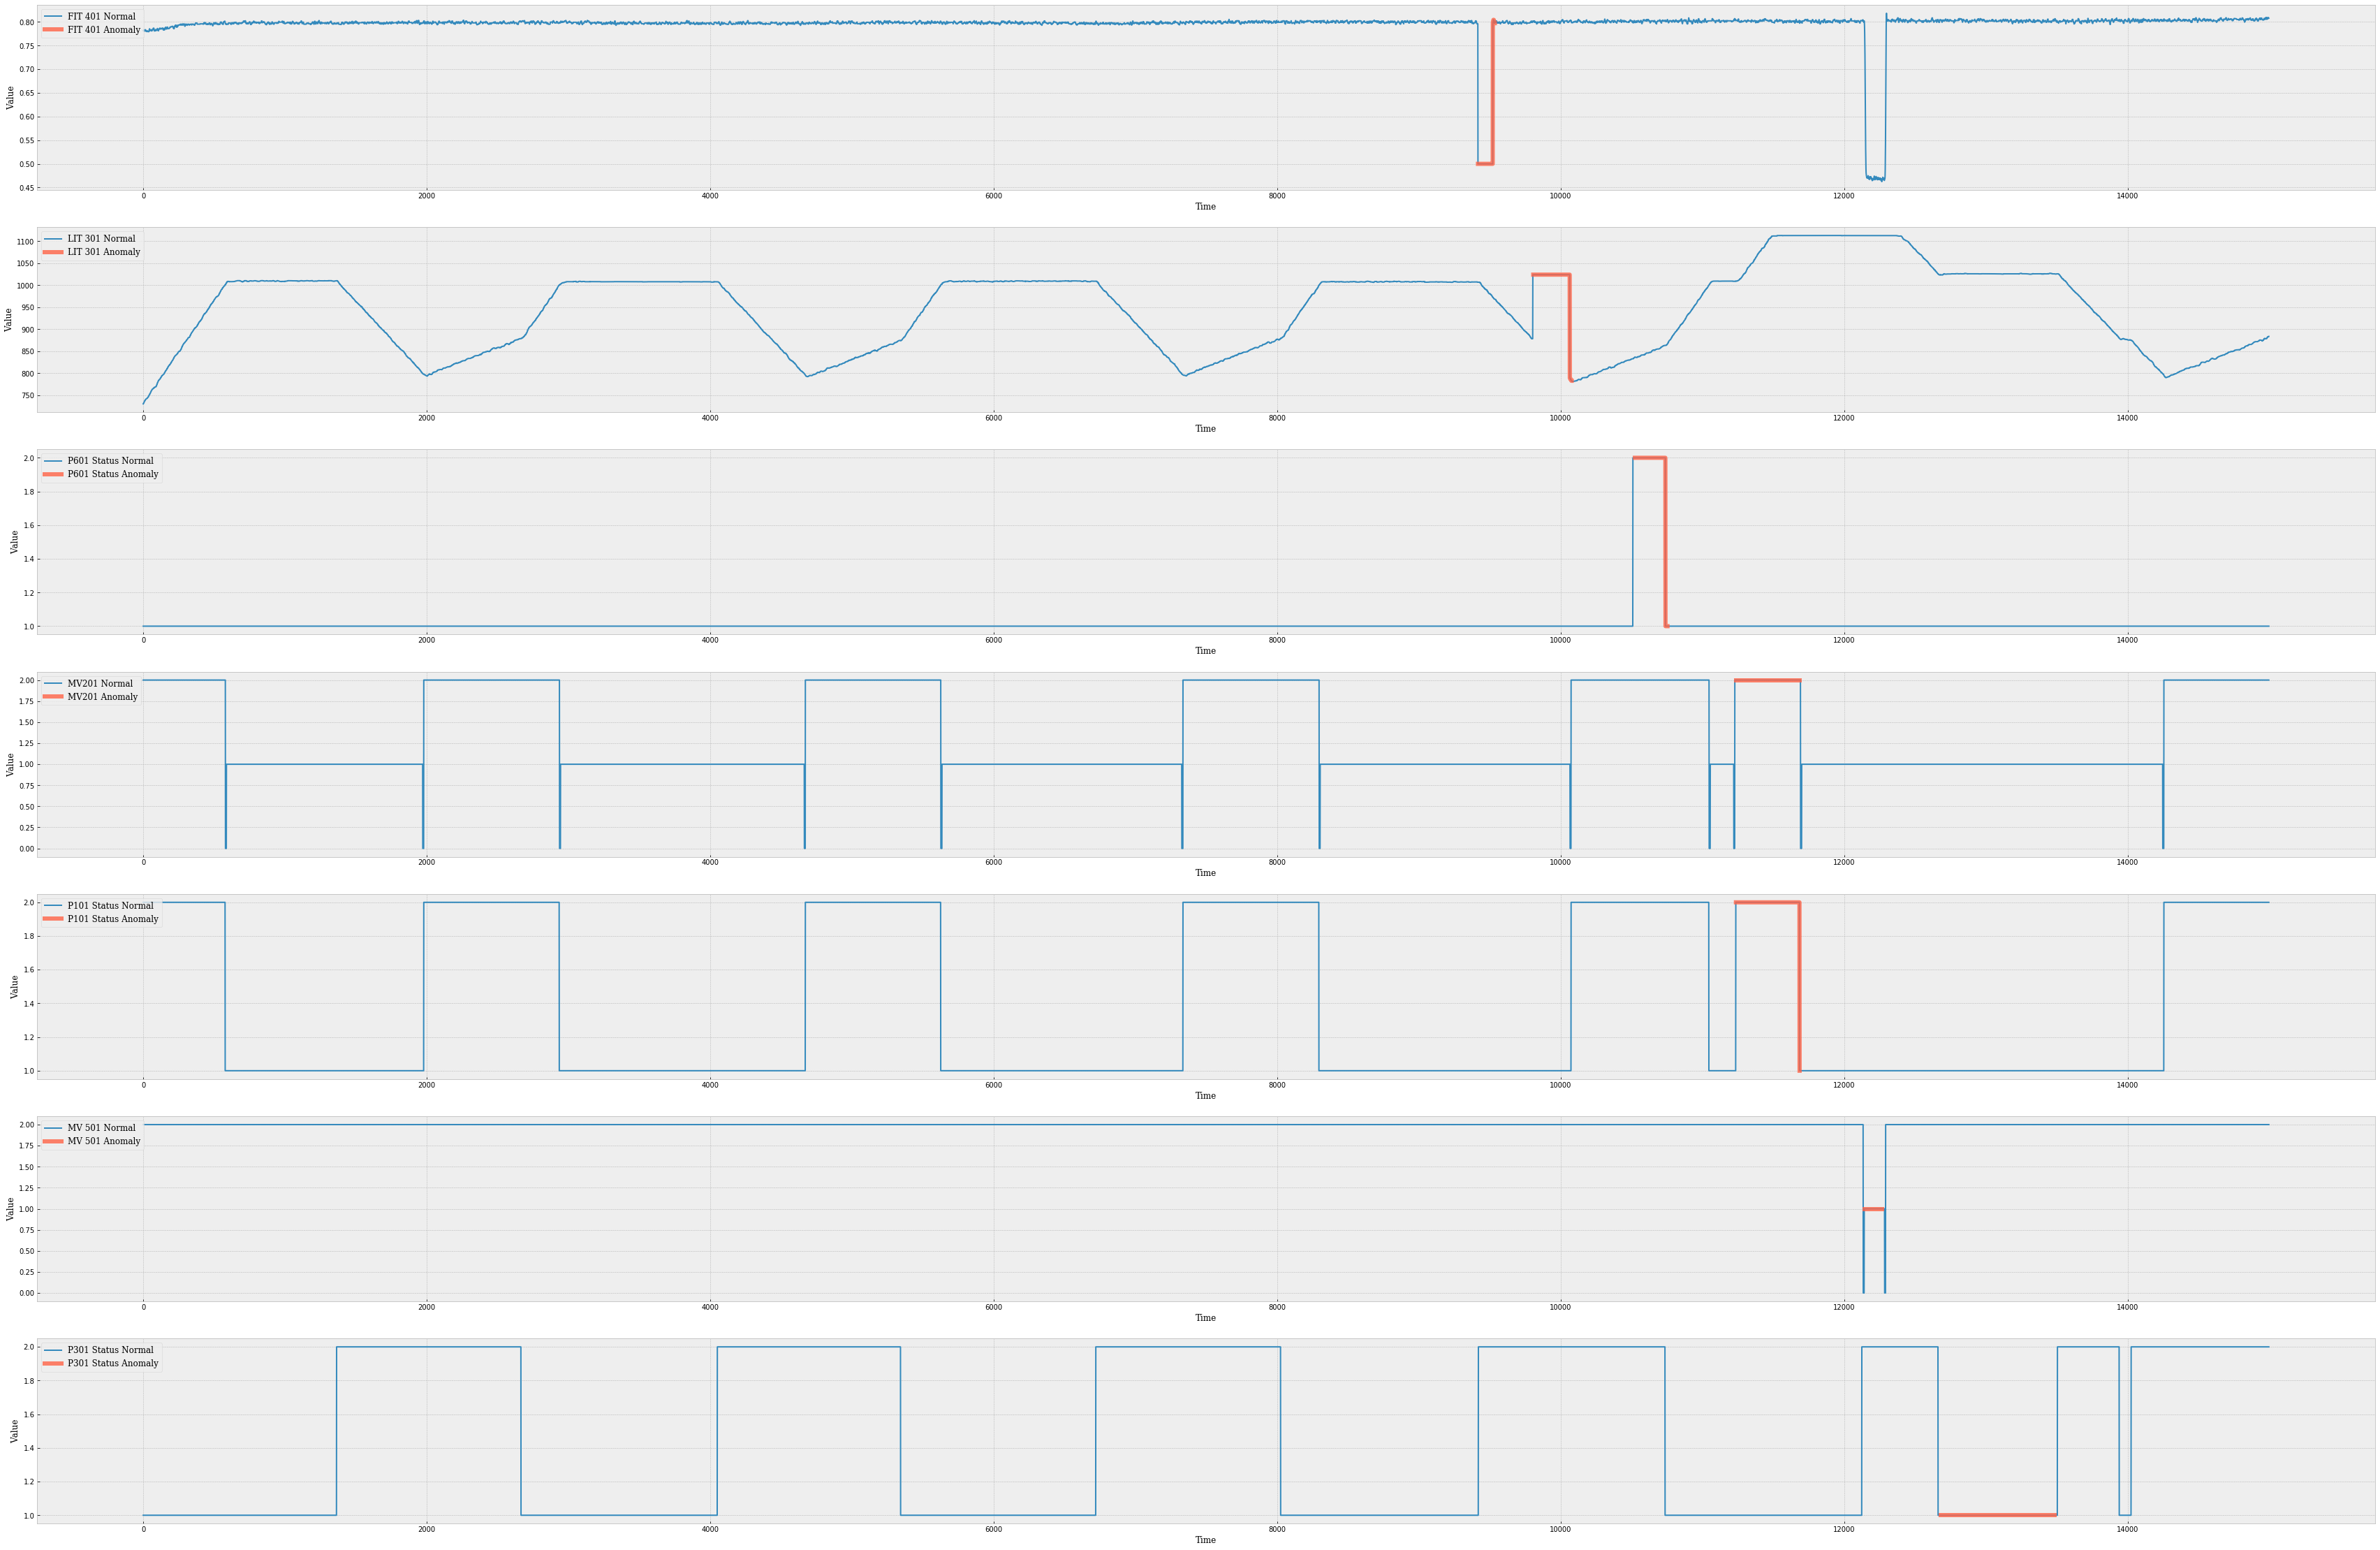

In [11]:
number_of_samples_2019 = swat_2019_attack.shape[0]
number_of_fig = len(anomaly_feature_2019)
with plt.style.context('bmh'):
    font = {'size': 12, 'family': 'serif'}
    font_legend = {'size': 12, 'family': 'serif'}
    fig, axs = plt.subplots(number_of_fig, 1, figsize=(60, 40))
    for i in range(number_of_fig):
        start_attack_time = anomaly_time_start_2019[i]
        end_attack_time = anomaly_time_end_2019[i]
        attack_df = swat_2019_attack[swat_2019_attack["Timestamps"] >= start_attack_time]
        attack_df = attack_df[attack_df["Timestamps"] <= end_attack_time]
        attack_indx =list(attack_df.index)
        
        label = "label_" + anomaly_feature_2019[i]
        label_data = [0] * number_of_samples_2019
        swat_2019_attack[label] = label_data
        swat_2019_attack[label][attack_indx] = 1
        
        axs[i].plot(swat_2019_attack[anomaly_feature_2019[i]],label='{} Normal'.format(anomaly_feature_2019[i]))
        axs[i].plot(swat_2019_attack[anomaly_feature_2019[i]].loc[attack_indx],label='{} Anomaly'.format(anomaly_feature_2019[i]), color='tomato', linewidth=6, alpha=0.8)
        axs[i].set_xlabel('Time', fontdict=font)
        axs[i].set_ylabel('Value', fontdict=font)
        axs[i].legend(loc='upper left', prop=font_legend)

In [ ]:
swat_2019_attack.to_pickle(DATA_PATH+"swat_2019_attack_df.pkl")